In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import missingno as msno
import tensorflow as tf

# Import from sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder, LabelBinarizer, LabelEncoder
import category_encoders as ce
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix, multilabel_confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, plot_roc_curve, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier

import pickle

# Set a random seed
from numpy.random import seed
seed(8)
from tensorflow.random import set_seed
set_seed(8)

# Data Visualization
sns.set_theme(context='notebook', style='darkgrid', palette='viridis')

import warnings
warnings.filterwarnings("ignore")

In [2]:
mood = pd.read_csv('mood_label.csv')
mood.head()

,name,artist,track_id,instrumentalness,danceability,energy,liveness,loudness,acousticness,valence,speechiness,tempo,key,time_signature,length,popularity,mood,mood_map
0,Kiss Me More (feat. SZA),Doja Cat,748mdHapucXQri7IAO8yFK,0.000158,0.762,0.701,0.1230,-3.541,0.2350,0.742,0.0286,110.968,8,4,208866,92,Energetic,2
1,seaside_demo,SEB,73M0rMVx5CWE8M4uATSsto,0.000133,0.706,0.824,0.1110,-7.959,0.3550,0.860,0.0694,94.980,0,4,132000,57,Energetic,2
2,Honeypie,JAWNY,6JqYhSdTE4WbQrMXxPH5cD,0.000000,0.742,0.678,0.1510,-4.605,0.0698,0.927,0.1920,115.050,5,4,135521,0,Energetic,2
3,Heat Waves,Glass Animals,02MWAaffLxlfxAUY7c5dvx,0.000007,0.761,0.525,0.0921,-6.900,0.4400,0.531,0.0944,80.870,11,4,238805,84,Energetic,2
4,Sheesh!,Surfaces,3ddNKnYpVx0uI8vcwbTQ5Y,0.000000,0.743,0.832,0.0925,-3.937,0.1610,0.801,0.0611,149.951,5,4,148846,74,Energetic,2


In [3]:
mood.shape

(5411, 18)

In [4]:
# mood.to_csv('mood_label.csv', index=False)

In [5]:
mood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5411 entries, 0 to 5410
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5411 non-null   object 
 1   artist            5411 non-null   object 
 2   track_id          5411 non-null   object 
 3   instrumentalness  5411 non-null   float64
 4   danceability      5411 non-null   float64
 5   energy            5411 non-null   float64
 6   liveness          5411 non-null   float64
 7   loudness          5411 non-null   float64
 8   acousticness      5411 non-null   float64
 9   valence           5411 non-null   float64
 10  speechiness       5411 non-null   float64
 11  tempo             5411 non-null   float64
 12  key               5411 non-null   int64  
 13  time_signature    5411 non-null   int64  
 14  length            5411 non-null   int64  
 15  popularity        5411 non-null   int64  
 16  mood              5411 non-null   object 


#### **Null model:** 
###### Evaluate class imbalances
###### Classes are not balanced

In [6]:
mood['mood'].value_counts(normalize=True)

Energetic    0.474958
Calm         0.276289
Sad          0.248753
Name: mood, dtype: float64

#### **Pre-processing**

In [80]:
# make copy of dataframe
mood = mood.copy()

# X audio features
X = mood[['danceability', 
               'energy', 
               'loudness', 
               'speechiness', 
               'acousticness',
               'instrumentalness', 
               'liveness', 
               'valence', 
               'tempo',
               'key']]

mood['vibe'] = mood['mood_map'].map({0:0, 1:0, 2:1})

y=mood['vibe']

#### **Null Model**

In [81]:
y.value_counts(normalize=True)

0    0.525042
1    0.474958
Name: vibe, dtype: float64

#### **Pre-processing**

In [96]:
# make copy of dataframe
mood = mood.copy()

# X audio features
X = mood[['danceability', 
               'energy', 
               'loudness', 
               'speechiness', 
               'acousticness',
               'instrumentalness', 
               'liveness', 
               'valence', 
               'tempo',
               'key']]

mood['vibe'] = mood['mood_map'].map({0:0, 1:0, 2:1})

y=mood['vibe']
# set up train_test_split with stratification to include equal classes of each
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.25, 
                                                     stratify=y, 
                                                     random_state=42)

# standardize X data
standard = StandardScaler()
X_train_standard = x.fit_transform(X_train)
X_test_standard = x.transform(X_test)

In [97]:
# make copy of dataframe
mood = mood.copy()

# X audio features
X = mood[['danceability', 
               'energy', 
               'loudness', 
               'speechiness', 
               'acousticness',
               'instrumentalness', 
               'liveness', 
               'valence', 
               'tempo',
               'key']]

mood['vibe'] = mood['mood_map'].map({0:0, 1:0, 2:1})

y=mood['vibe']
# set up train_test_split with stratification to include equal classes of each
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.25, 
                                                     stratify=y, 
                                                     random_state=42)

# standardize X data
scale = MinMaxScaler()
X_train_scale = x.fit_transform(X_train)
X_test_scale = x.transform(X_test)

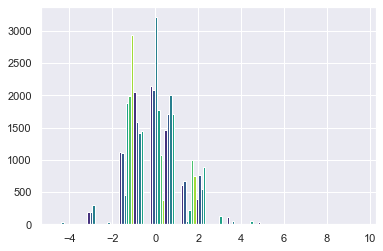

In [100]:
sns.set_theme(context='notebook', style='darkgrid', palette='viridis')
plt.hist(X_train_standard, bins=10);

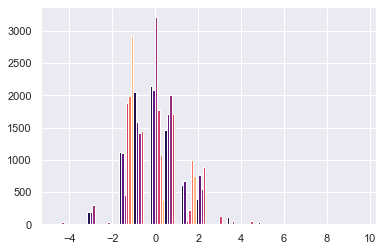

In [99]:
sns.set_theme(context='notebook', style='darkgrid', palette='magma')
plt.hist(X_train_scale, bins=10);

In [104]:
model = LogisticRegression(C=10)
model.fit(X_train_standard, y_train)
print(f'{model.score(X_train_standard, y_train)}')
print(f'{model.score(X_test_standard, y_test)}')

0.8193691473632331
0.8255728011825573


In [159]:
X = mood[['danceability', 
           'energy', 
           'loudness', 
           'speechiness', 
           'acousticness',
           'instrumentalness', 
           'liveness', 
           'valence', 
           'tempo',
           'key']]

mood['vibe'] = mood['mood_map'].map({0:0, 1:0, 2:1})

y = mood['vibe']

# # set up train_test_split with stratification to include equal classes of each
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    stratify=y, 
                                                    random_state=42)


In [175]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ("minmax", MinMaxScaler()),
    ("pc", PCA(n_components=61)),
    ("logreg", LogisticRegressionCV(solver='liblinear', penalty='l1', random_state=42, max_iter=200))])

pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.8309512074913751
0.8226164079822617


In [198]:
X = mood[['danceability', 
           'energy', 
           'loudness', 
           'speechiness', 
           'acousticness',
           'instrumentalness', 
           'liveness', 
           'valence', 
           'tempo',
           'key',
           'vibe']]

mood['vibe'] = mood['mood_map'].map({0:0, 1:0, 2:1})

y = mood['mood_map']

# set up train_test_split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    stratify=y, 
                                                    random_state=42)

In [205]:
%%time
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ("minmax", MinMaxScaler()),
    ("pc", PCA(n_components=32)),
    ("logreg", LogisticRegressionCV(multi_class='multinomial', random_state=42, max_iter=50))])

pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.8602759980285856
0.8706577974870657
Wall time: 2.71 s


In [ ]:
pickle.dump(pipe, open('streamlit_app/final_mood_model.pkl', 'wb'))

In [296]:
preds=gs.predict(X_test)
e = []
b = []
j = []
for pred in preds:
    if pred == 0:
        e.append(pred)
print(len(e))
        

346


In [208]:
pipe.classes_

array([0, 1, 2], dtype=int64)

In [210]:
accuracy_score(y_test, preds)

0.8654841093865484

In [218]:
print(f'Sad: {precision_score(y_test, preds, average=None)[0]}')
print(f'Calm: {precision_score(y_test, preds, average=None)[1]}')
print(f'Energetic: {precision_score(y_test, preds, average=None)[2]}')
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='weighted'))

Sad: 0.7440476190476191
Calm: 0.7433155080213903
Energetic: 1.0
0.8291210423563364
0.8654841093865484


In [221]:
print(f'Sad: {recall_score(y_test, preds, average=None)[0]}')
print(f'Calm: {recall_score(y_test, preds, average=None)[1]}')
print(f'Energetic: {recall_score(y_test, preds, average=None)[2]}')
print(recall_score(y_test, preds, average='macro'))
print(recall_score(y_test, preds, average='weighted'))

Sad: 0.7440476190476191
Calm: 0.7433155080213903
Energetic: 1.0
0.8291210423563364
0.8654841093865484


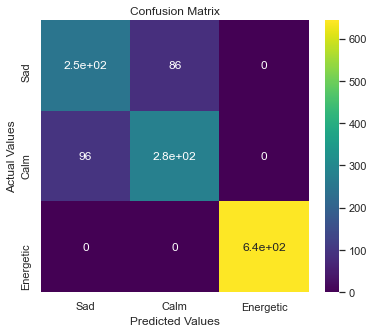

In [222]:
cm = confusion_matrix(y_test, preds, labels=pipe.classes_)
cm_df = pd.DataFrame(cm, index=['Sad', 'Calm', 'Energetic'], columns=['Sad', 'Calm', 'Energetic'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, cmap='viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [223]:
print(f'Sad: {f1_score(y_test, preds, average=None)[0]}')
print(f'Calm: {f1_score(y_test, preds, average=None)[1]}')
print(f'Energetic: {f1_score(y_test, preds, average=None)[2]}')

Sad: 0.7331378299120235
Calm: 0.7533875338753387
Energetic: 1.0


In [224]:
print(f"Macro: {f1_score(y_test, preds, average='macro')}")
print(f"Weighted: {f1_score(y_test, preds, average='weighted')}")

Macro: 0.8288417879291208
Weighted: 0.8655589419954299


In [227]:
pred_df = pd.DataFrame({'true_values'     : y_test,
                        'prediction_prob' : pipe.predict_proba(X_test)[:,1]})

In [284]:
pred_df.head(30)

,true_values,prediction_prob
3307,1,5.316962e-01
2418,2,1.284014e-05
3754,1,3.016440e-01
4762,0,8.416385e-01
2841,2,1.495956e-06
3384,1,2.847469e-01
3690,1,2.964670e-01
3169,2,1.000774e-05
5218,2,3.517210e-06
2657,2,2.953487e-06


In [230]:
# Generate class membership probabilities
y_pred_probs = pipe.predict_proba(X_test)

roc_curve_weighted=roc_auc_score(y_test, y_pred_probs, average="weighted", multi_class="ovr")
roc_curve_macro=roc_auc_score(y_test, y_pred_probs, average='macro', multi_class="ovr")
print(roc_curve_weighted)
print(roc_curve_macro)

0.9634310029522949
0.9534559340319305


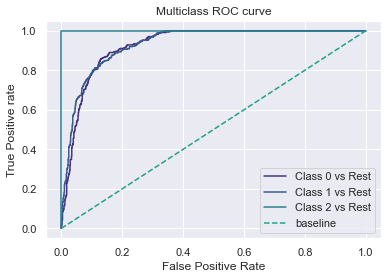

In [231]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_probs[:,i], pos_label=i)
    
# plotting  
sns.set_palette('viridis')
plt.plot(fpr[0], tpr[0], linestyle='-',label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='-',label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='-',label='Class 2 vs Rest')

# add worst case scenario line
plt.plot([0, 1], [0, 1], label="baseline", linestyle="--")

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC');  

In [347]:
def audio_analysis(playlist_id):    
    import spotipy
    from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth

    # user credentials
    client_id = 'YOUR CLIENT ID'
    client_secret = 'YOUR CLIENT SECRET'
    redirect_url = 'YOUR REDIRECT URL'
    user_id = 'YOUR USER ID'
    scope_playlist = 'playlist-read-private'
    
    # get user authorization
    user_auth_manager = SpotifyOAuth(scope=scope_playlist,client_id=client_id,client_secret=client_secret,username=user_id, redirect_uri=redirect_url)
    sp = spotipy.Spotify(auth_manager=user_auth_manager)
    
    # get list of track ids in playlist
    playlist = sp.playlist_tracks(playlist_id)
    song_ids = []
    for result in playlist['tracks']['items']:
        song_ids.append(result['track']['id'])
    
    features_data = []
    
    for track in song_ids:
        audio_features_list = sp.audio_features(tracks=track)

        for feature in audio_features_list:
        
            acousticness = feature['acousticness']
            danceability = feature['danceability']
            energy = feature['energy']
            instrumentalness = feature['instrumentalness']
            liveness = feature['liveness']
            valence = feature['valence']
            loudness = feature['loudness']
            speechiness = feature['speechiness']
            tempo = feature['tempo']
            key = feature['key']
            time_signature = feature['time_signature']
            track_id = feature['id']
            track = sp.track(track_id)
            name = track['name']
            artist = track['artists'][0]['name']
            length = track['duration_ms']
            popularity = track['popularity']
            features_data.append([name, 
                                  artist, 
                                  track_id, 
                                  instrumentalness, 
                                  danceability, 
                                  energy, 
                                  liveness, 
                                  loudness, 
                                  acousticness, 
                                  valence, 
                                  speechiness,
                                  tempo, 
                                  key,
                                  time_signature,
                                  length,
                                  popularity])
    df = pd.DataFrame(features_data, columns = ['name', 
                                                'artist', 
                                                'track_id', 
                                                'instrumentalness', 
                                                'danceability', 
                                                'energy', 
                                                'liveness', 
                                                'loudness', 
                                                'acousticness', 
                                                'valence', 
                                                'speechiness',
                                                'tempo', 
                                                'key',
                                                'time_signature',
                                                'length',
                                                'popularity'])
    
    X_audio = df[['danceability', 
       'energy', 
       'loudness', 
       'speechiness', 
       'acousticness',
       'instrumentalness', 
       'liveness', 
       'valence', 
       'tempo',
       'key']]
    
    xc = StandardScaler()
    X = xc.fit_transform(X_audio)
    
    km = KMeans(n_clusters=2)
    km.fit(X)
    df['vibe'] = km.labels_
    
    X = df[['danceability', 
           'energy', 
           'loudness', 
           'speechiness', 
           'acousticness',
           'instrumentalness', 
           'liveness', 
           'valence', 
           'tempo',
           'key',
           'vibe']]
    
    
    pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ("minmax", MinMaxScaler()),
    ("pc", PCA(n_components=32)),
    ("logreg", LogisticRegressionCV(multi_class='multinomial', random_state=42, max_iter=50))])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X)
    preds_list=[x for x in preds]
    
    n = len(preds_list)
    sad = []
    chill = []
    energetic = []
    
    for pred in preds_list:
        if pred == 0:
            sad.append(pred)
    for pred in preds_list:
        if pred == 1:
            chill.append(pred)
    for pred in preds_list:
        if pred == 2:
            energetic.append(pred)
            
    n_sad = len(sad)
    n_chill = len(chill)
    n_energetic = len(energetic)
    return print(f'This playlist is {np.round((n_sad/(n))*100,0)}% Sad, {np.round((n_chill/(n))*100,0)}% Chill, and {np.round((n_energetic/(n))*100,0)}% Energetic')


In [348]:
audio_analysis(playlist_id='7od0I5IC3GfzXeGj3i6ugy?si=c67a8ca3029a4005')

This playlist is 0.0% Sad, 33.0% Chill, and 67.0% Energetic


In [349]:
pickle.dump(audio_analysis, open('streamlit_app/playlist_predict_mood.pkl', 'wb'))

In [350]:
with open('streamlit_app/audio_analysis_function.pkl', 'wb') as pickle_out:
    pickle_out = pickle.dump(audio_analysis, pickle_out)

#### **Null model:** 
###### Evaluate class imbalances
###### Classes are not balanced

In [30]:
mood['mood'].value_counts(normalize=True)

Energetic    0.529133
Calm         0.246037
Sad          0.224830
Name: mood, dtype: float64

In [31]:
# X audio features
X = mood[['danceability', 
          'energy', 
          'loudness', 
          'speechiness', 
          'acousticness',
          'instrumentalness', 
          'liveness', 
          'valence', 
          'tempo',
          'key']]

# response variable
y = mood['mood_map']

# # set up train_test_split with stratification to include equal classes of each
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=42)

# standardize X data
x = MinMaxScaler()
X_train_x = x.fit_transform(X_train)
X_test_x = x.transform(X_test)

# LabelBinarizer for multiclass classification response variable
# binarize = LabelBinarizer()
# y_train_binarize = binarize.fit_transform(y_train)
# y_test_binarize = binarize.transform(y_test)

In [32]:
logreg=LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train_x, y_train)
# Score on training and testing sets.
print(f'Training Score: {round(logreg.score(X_train_x, y_train),4)}')
print(f'Testing Score: {round(logreg.score(X_test_x, y_test),4)}')

Training Score: 0.7167
Testing Score: 0.7215


In [33]:
# X audio features
X_audio = mood[['danceability', 
          'energy', 
          'loudness', 
          'speechiness', 
          'acousticness',
          'instrumentalness', 
          'liveness', 
          'valence', 
          'tempo',
          'key']]

# response variable
y = mood['mood_map']


pf = PolynomialFeatures(degree = 3)
X = pf.fit_transform(X_audio)

# # set up train_test_split with stratification to include equal classes of each
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=42)

# standardize X data
x = MinMaxScaler()
X_train_x = x.fit_transform(X_train)
X_test_x = x.transform(X_test)

# instantiate PCA
pca = PCA(n_components=40, random_state = 42)
Z_train = pca.fit_transform(X_train_x)
Z_test = pca.transform(X_test_x)

# LabelBinarizer for multiclass classification response variable
binarize = LabelBinarizer()
y_train_binarize = binarize.fit_transform(y_train)
y_test_binarize = binarize.transform(y_test)

In [34]:
def mood_model():
    
    n_input = Z_train[0].shape

    model = Sequential()

    model.add(Dense(12, 
                    activation='relu', 
                    input_shape=(n_input)))
    model.add(Dropout(0.2))
    
    model.add(Dense(6, activation='relu'))

    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=[['accuracy'],
                           [tf.keras.metrics.Precision()],
                           [tf.keras.metrics.Recall()]])

    return model

In [35]:
classifier_2 = KerasClassifier(build_fn=mood_model,
                             epochs=200,
                             verbose=0)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, 
                               verbose=1, mode='auto')
history_2=classifier_2.fit(Z_train,
               y_train_binarize,
               validation_data=(Z_test, y_test_binarize),
               epochs=200,
               batch_size=32,
               callbacks=[early_stop],
               verbose=0)
print(f'Train score: {classifier_2.score(Z_train, y_train_binarize)}')
print(f'Test score: {classifier_2.score(Z_test, y_test_binarize)}')

Epoch 00027: early stopping
Train score: 0.7281553149223328
Test score: 0.7304526567459106


In [36]:
logreg=LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(Z_train, y_train)
# Score on training and testing sets.
print(f'Training Score: {round(logreg.score(Z_train, y_train),4)}')
print(f'Testing Score: {round(logreg.score(Z_test, y_test),4)}')

Training Score: 0.722
Testing Score: 0.7305


In [37]:
abc = AdaBoostClassifier(random_state=42, n_estimators=3)
abc.fit(Z_train,y_train)
print(abc.score(Z_train, y_train))
print(abc.score(Z_test, y_test))

0.7166813768755517
0.7153635116598079


In [38]:
gbc = GradientBoostingClassifier(n_estimators = 10, max_depth=1, random_state=42)
gbc.fit(Z_train, y_train)
print(gbc.score(Z_train, y_train))
print(gbc.score(Z_test, y_test))

0.6881435716387173
0.700960219478738


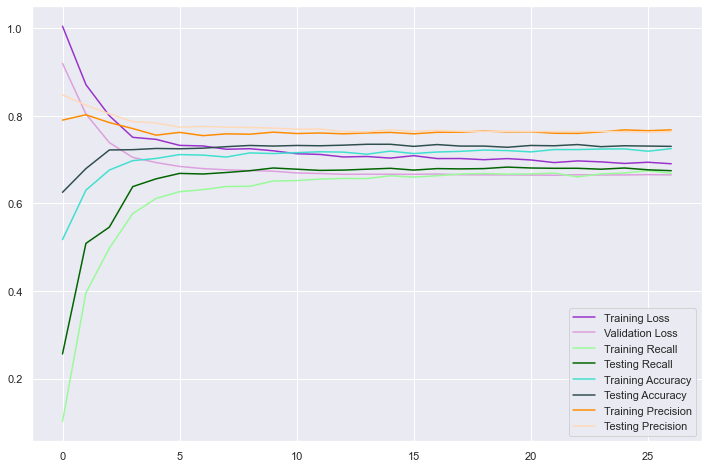

In [39]:
train_acc = history_2.history['accuracy']
test_acc = history_2.history['val_accuracy']
train_recall = history_2.history['recall_1']
test_recall = history_2.history['val_recall_1']
train_precision = history_2.history['precision_1']
test_precision = history_2.history['val_precision_1']
plt.figure(figsize=(12,8))
plt.plot(history_2.history['loss'], label='Training Loss', color="darkorchid")
plt.plot(history_2.history['val_loss'], label='Validation Loss', color='plum')
plt.plot(train_recall, label='Training Recall', color='palegreen')
plt.plot(test_recall, label='Testing Recall', color = 'darkgreen')
plt.plot(train_acc, label='Training Accuracy', color='turquoise')
plt.plot(test_acc, label='Testing Accuracy', color="darkslategray");
plt.plot(train_precision, label='Training Precision', color="darkorange")
plt.plot(test_precision, label='Testing Precision', color='peachpuff')
plt.legend();

In [40]:
print(f'Train score: {classifier_2.model.evaluate(Z_train, y_train_binarize)}')
print(f'Test score: {classifier_2.model.evaluate(Z_test, y_test_binarize)}')

107/107 [==============================] - 0s 905us/step - loss: 0.6730 - accuracy: 0.7282 - precision_1: 0.7675 - recall_1: 0.6799
Train score: [0.6729740500450134, 0.7281553149223328, 0.7675191164016724, 0.6799058318138123]
46/46 [==============================] - 0s 991us/step - loss: 0.6653 - accuracy: 0.7305 - precision_1: 0.7640 - recall_1: 0.6749
Test score: [0.6652548909187317, 0.7304526567459106, 0.7639751434326172, 0.6748971343040466]


In [41]:
y_preds_2=classifier_2.predict(Z_test)

C:\Users\Brianna\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


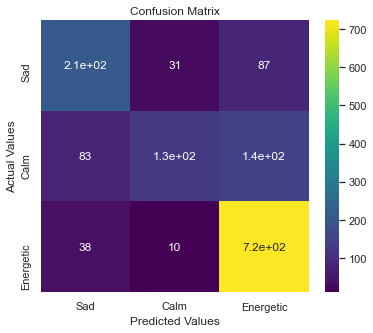

In [44]:
cm_2 = confusion_matrix(y_test, y_preds_2, labels=classifier_2.classes_)
cm_df_2 = pd.DataFrame(cm, index=['Sad', 'Calm', 'Energetic'], columns=['Sad', 'Calm', 'Energetic'])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, cmap='viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [47]:
pred_df_2 = pd.DataFrame({'true_values'     : y_test,
                        'prediction_prob' : classifier_2.predict_proba(Z_test)[:,1]})

In [48]:
# Generate class membership probabilities
y_pred_probs_2 = classifier_2.predict_proba(Z_test)

roc_curve_weighted=roc_auc_score(y_test, y_pred_probs_2, average="weighted", multi_class="ovr")
roc_curve_macro=roc_auc_score(y_test, y_pred_probs_2, average='macro', multi_class="ovr")
print(roc_curve_weighted)
print(roc_curve_macro)

0.8500444502286766
0.8391576829782115


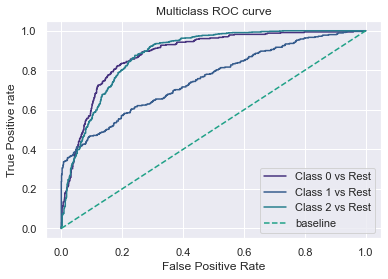

In [49]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_probs_2[:,i], pos_label=i)
    
# plotting  
sns.set_palette('viridis')
plt.plot(fpr[0], tpr[0], linestyle='-',label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='-',label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='-',label='Class 2 vs Rest')

# add worst case scenario line
plt.plot([0, 1], [0, 1], label="baseline", linestyle="--")

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC'); 

#### **Transfer with KMeans**

In [50]:
mood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4857 entries, 0 to 685
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4857 non-null   object 
 1   artist            4857 non-null   object 
 2   track_id          4857 non-null   object 
 3   instrumentalness  4857 non-null   float64
 4   danceability      4857 non-null   float64
 5   energy            4857 non-null   float64
 6   liveness          4857 non-null   float64
 7   loudness          4857 non-null   float64
 8   acousticness      4857 non-null   float64
 9   valence           4857 non-null   float64
 10  speechiness       4857 non-null   float64
 11  tempo             4857 non-null   float64
 12  key               4857 non-null   int64  
 13  time_signature    4857 non-null   int64  
 14  length            4857 non-null   int64  
 15  popularity        4857 non-null   int64  
 16  mood              4857 non-null   object 
 

In [53]:
%%time
# set X features
X = mood[['danceability', 
               'energy', 
               'loudness', 
               'speechiness', 
               'acousticness',
               'instrumentalness', 
               'liveness', 
               'valence', 
               'tempo']]

# standardize X data
xc = StandardScaler()
X_xc= xc.fit_transform(X)

scores = []
for k in range(2,31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_xc)
    inertia = cl.inertia_
    sil = silhouette_score(X_xc, cl.labels_)
    scores.append([k, inertia, sil])
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

Wall time: 22.7 s


In [57]:
score_df.head()

,k,inertia,silhouette
0,2,31861.104694,0.302213
1,3,28112.587464,0.230252
2,4,24783.140131,0.244336
3,5,22248.357478,0.218935
4,6,20232.733510,0.201925


In [58]:
km = KMeans(n_clusters=4)
km.fit(X_xc)
# Scaled X gives best results
mood['cluster'] = km.labels_

No handles with labels found to put in legend.


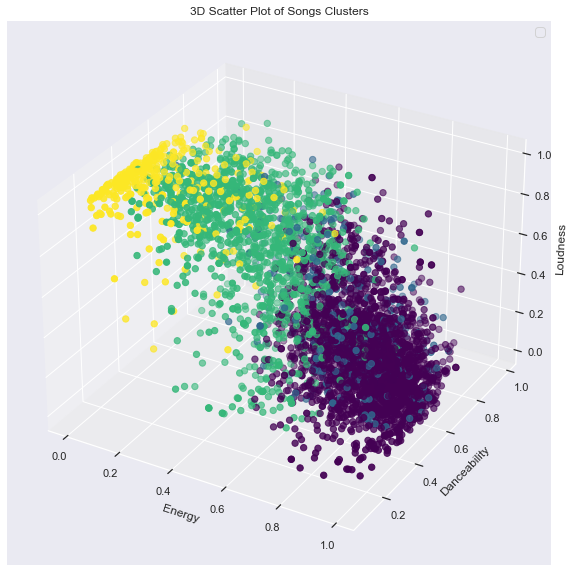

In [66]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
x = mood['energy']
y = mood['danceability']
z = mood['acousticness']
a = mood['speechiness']
ax.scatter(x,y,z,c=mood['cluster'], s=40, cmap='viridis')
ax.legend(fontsize=12, title_fontsize=12)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clusters");